# Cheap Models
- Jerry's code from previous project, trying to use it to perform a bunch of different models for this project
- Still need to tweak functions so they can be used for this project.

In [1]:
# Copied and pasted from my imports from project 3, 
# delete if we dont need(Aerika)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB, ComplementNB, GaussianNB, BernoulliNB

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import ToktokTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords 

import regex as re

from scipy.stats import ttest_ind

In [3]:
df = pd.read_csv('../data/data_income.csv')
df.head()

,Unnamed: 0,alias,category,city,id,latitude,longitude,price,rating,review_count,zip_code,ave_agi
0,0,いざかや-おせん-izakaya-osen-los-angeles,"['sushi', 'izakaya', 'seafood']",Los Angeles,us0WnDOySVXXXwCqs0AaCw,34.083192,-118.273245,$$,4.5,651.0,90026.0,44.191297
1,1,yummy-crepe-stand-los-angeles,"['streetvendors', 'creperies']",Los Angeles,xFMzCotq4cURN37cvTr9eQ,34.078743,-118.263756,$,4.5,3.0,90026.0,44.191297
2,2,yum-yum-shave-ice-los-angeles-2,"['shavedice', 'foodstands']",Los Angeles,Tub-psQGYAjbtny6MnfQmg,34.077049,-118.258873,$,5.0,2.0,90026.0,44.191297
3,3,yoga-urt-los-angeles,"['icecream', 'juicebars', 'vegan']",Los Angeles,vsRKNraKeeddoOXL2btQ5A,34.077688,-118.265555,$,4.5,46.0,90026.0,44.191297
4,4,yami-yaki-los-angeles-2,['teppanyaki'],Los Angeles,Bcp6NEv7CGTOtnIgvo6Unw,34.077917,-118.263523,$,4.5,74.0,90026.0,44.191297


In [6]:
df = df.drop(columns='Unnamed: 0')

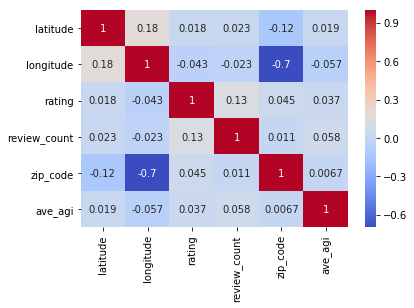

In [8]:
sns.heatmap(df.corr(),
           annot = True,
           cmap = 'coolwarm')

In [16]:
# Not sure if this is how we should be splitting this

X = master_df.drop('zip_code', axis = 1)
y = master_df['zip_code']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 42)

In [ ]:
def get_continuous(df):
    to_keep = ['age', 
               'fnlwgt', 
               'education-num', 
               'capital-gain', 
               'capital-loss',
               'hours-per-week',
               'agesq',
               'hrssq',
               'fnlwgtsq',
               'edusq',
               'gainsq',
               'lossq'
              ]
    return df[to_keep]

GetContinuous = FunctionTransformer(get_continuous, validate=False)

In [15]:
for estimator in estimators:
    pipe = Pipeline([
        ('union', FeatureUnion([
            ('continuous', Pipeline([
                ('get_continuous', GetContinuous),
                ('sc', StandardScaler())
            ])),
            ('categorical', GetCategorical)
        ])),
        (estimator, eval(f"est_dict['{estimator}']"))
    ])

NameError: name 'estimators' is not defined

In [ ]:
est_dict = {
    'logreg': LogisticRegression(solver='lbfgs'),
    'knn': KNeighborsClassifier(),
    'rand': RandomForestClassifier(n_estimators=100, random_state=111),
    'extra': ExtraTreesClassifier(n_estimators=100, random_state=111),
    'ada': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=111)
}

estimators = ['logreg', 'knn', 'rand', 'extra', 'ada']